In [ ]:
#visualize the weather, highs/lows/precip_mm/precip rating/wind_mph/wind rating
#join data into 1 df and start normalizing the data
#start looking for stories to dive deeper into
#create the streak/previous tournament placement graph

In [10]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [4]:
weather_df <- read.csv('/dsa/groups/casestudy2022su/team06/weather_data.csv')

In [19]:
head(weather_df)

X,date,station,wdf2,wdf5,wsf2,wsf5,wt01,wt02,wt03,wt08,fmax,fmin,course_location,wind_mph,wind_rating,prcp_mm,prcp_rating,year
<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<int>,<dbl>,<int>,<int>
0,04-10-2014,GHCND:USW00013837,170,170,67,89,0,0,0,0,77,52,"Augusta National Golf Club - Augusta, GA",6,2,0.0,0,2014
1,04-11-2014,GHCND:USW00013837,200,200,94,116,0,0,0,0,79,53,"Augusta National Golf Club - Augusta, GA",7,3,0.0,0,2014
2,04-12-2014,GHCND:USW00013837,200,180,54,76,0,0,0,0,84,57,"Augusta National Golf Club - Augusta, GA",4,2,0.0,0,2014
3,04-13-2014,GHCND:USW00013837,130,130,67,81,0,0,0,0,82,58,"Augusta National Golf Club - Augusta, GA",8,3,0.0,0,2014
4,01-29-2015,GHCND:USW00003192,70,220,31,40,1,0,0,0,70,56,"TPC Scottsdale - Scottsdale, AZ",1,1,4.1,2,2015
5,01-30-2015,GHCND:USW00003192,100,340,40,72,1,0,0,0,59,55,"TPC Scottsdale - Scottsdale, AZ",3,2,11.4,3,2015


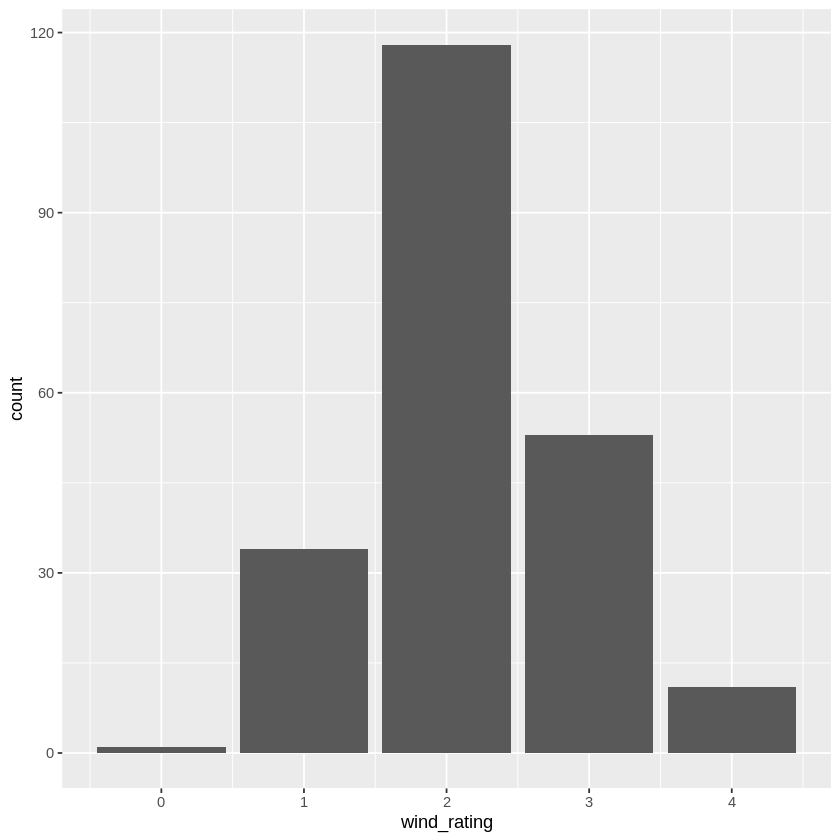

In [9]:
wind_rating_bar <- ggplot(data=weather_df, aes(x=wind_rating)) + geom_bar()
wind_rating_bar
#most wind ratings are low/mid. I am interested in which tournaments had high wind rating, maybe they can provide
#details on how the players played that day
#side note - the weather station is not entirely on the course, so some bias for the actual wind should be added
#we can expect hilton head would be windier than the main land because the course is right on the coast



In [47]:
high_winds <- weather_df %>%
filter(wind_rating == 4)
nrow(high_winds)
#11 tournaments had a high wind category

[1] 11

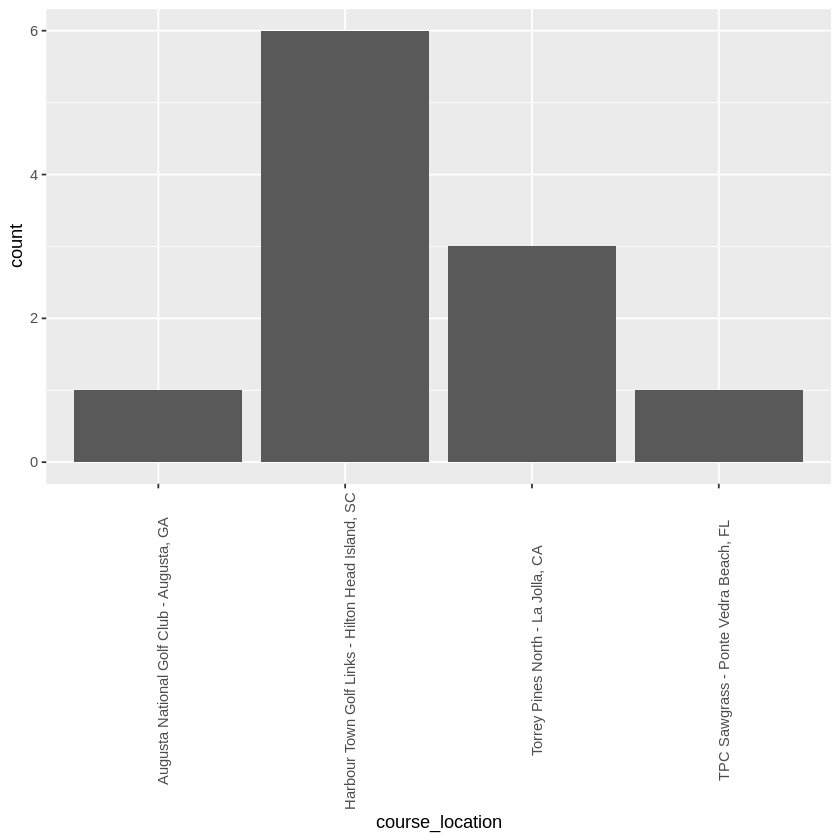

In [17]:
ggplot(data=high_winds, aes(x=course_location)) + geom_bar() +
theme(axis.text.x = element_text(angle=90))
#hilton head had the highest winds with 6 dates at a level 4 wind 
#this also does not account for the station being on the main land, wind was likely higher than a 4 rating

In [21]:
high_winds %>%
filter(course_location == 'Harbour Town Golf Links - Hilton Head Island, SC')
#the high winds came in 2015/2016/2018/2019

X,date,station,wdf2,wdf5,wsf2,wsf5,wt01,wt02,wt03,wt08,fmax,fmin,course_location,wind_mph,wind_rating,prcp_mm,prcp_rating,year
<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<int>,<dbl>,<int>,<int>
17,04-16-2015,GHCND:USW00093831,20,40,76,94,0,0,0,0,62,56,"Harbour Town Golf Links - Hilton Head Island, SC",12,4,0.0,0,2015
42,04-15-2016,GHCND:USW00093831,30,30,76,107,0,0,0,0,61,52,"Harbour Town Golf Links - Hilton Head Island, SC",12,4,2.0,1,2016
43,04-16-2016,GHCND:USW00093831,110,100,89,103,0,0,0,0,73,53,"Harbour Town Golf Links - Hilton Head Island, SC",12,4,0.0,0,2016
89,04-15-2018,GHCND:USW00093831,250,180,112,157,0,0,0,0,80,57,"Harbour Town Golf Links - Hilton Head Island, SC",12,4,26.9,3,2018
141,04-15-2019,GHCND:USW00093831,270,260,103,139,0,0,0,0,75,55,"Harbour Town Golf Links - Hilton Head Island, SC",13,4,0.0,0,2019
145,04-19-2019,GHCND:USW00093831,210,210,174,233,0,0,0,0,79,59,"Harbour Town Golf Links - Hilton Head Island, SC",15,4,14.5,3,2019


In [53]:
highest_winds <- high_winds %>%
group_by(date,course_location,wind_mph) %>%
summarise(max = max(wind_mph))
#torreypines and TPC sawgradd each had exceptionally windy days 
#torreypines in 2016 and TPC sawgrass 2022
#could look to see how they played on these windy days
highest_winds

date,course_location,wind_mph,max
<fct>,<fct>,<dbl>,<dbl>
01-31-2016,"Torrey Pines North - La Jolla, CA",17,17
02-01-2016,"Torrey Pines North - La Jolla, CA",14,14
02-17-2019,"Torrey Pines North - La Jolla, CA",13,13
03-12-2022,"TPC Sawgrass - Ponte Vedra Beach, FL",17,17
04-14-2019,"Augusta National Golf Club - Augusta, GA",12,12
04-15-2016,"Harbour Town Golf Links - Hilton Head Island, SC",12,12
04-15-2018,"Harbour Town Golf Links - Hilton Head Island, SC",12,12
04-15-2019,"Harbour Town Golf Links - Hilton Head Island, SC",13,13
04-16-2015,"Harbour Town Golf Links - Hilton Head Island, SC",12,12


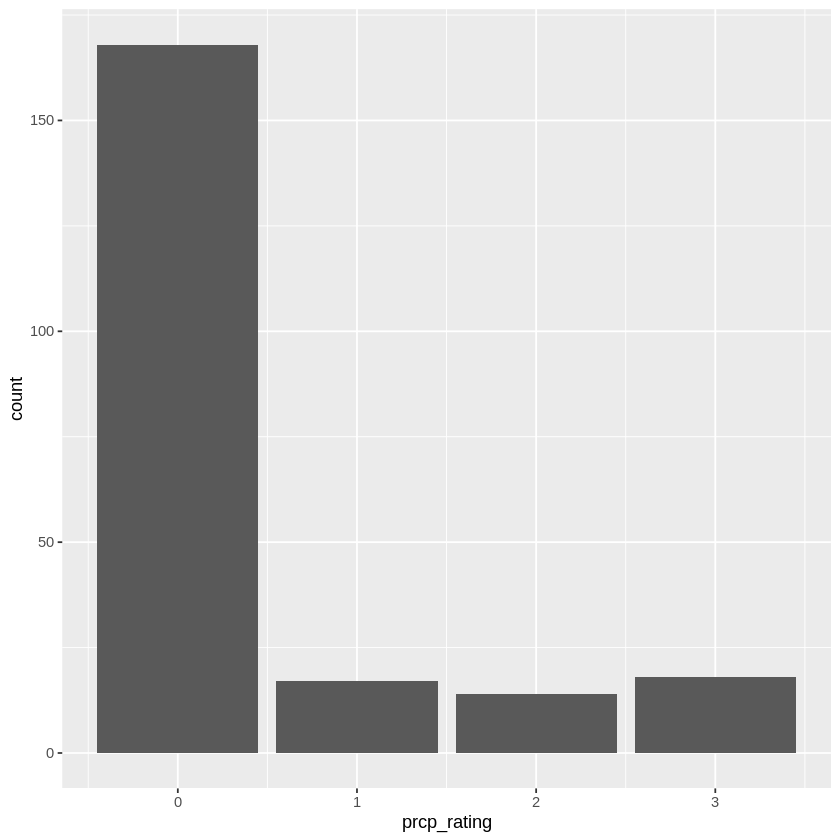

In [30]:
rain_rating_bar <- ggplot(data=weather_df, aes(x=prcp_rating)) + geom_bar()
rain_rating_bar
#very few heavy rainy days - I expect this to also be hilton head 

In [48]:
high_rain <- weather_df %>%
filter(prcp_rating == 3)
nrow(high_rain)
#18 high days - lets see which locations got the rainy days

[1] 18

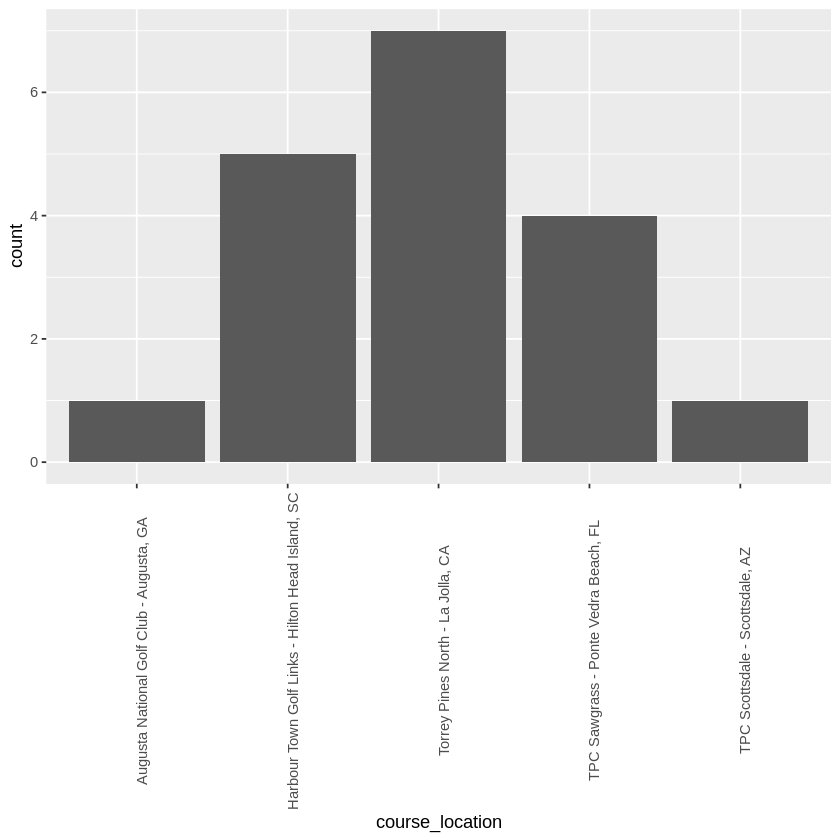

In [32]:
ggplot(data=high_rain, aes(x=course_location)) + geom_bar() +
theme(axis.text.x = element_text(angle=90))
#rain is pretty evenly distributed - torrey pines got the most rainy days with 7

In [33]:
high_rain %>%
group_by(date,course_location,prcp_mm) %>%
summarise(max = max(prcp_mm))
#These are the days with heaviest rain - I can see a few dates with above 30mm of rain

date,course_location,prcp_mm,max
<fct>,<fct>,<dbl>,<dbl>
01-29-2021,"Torrey Pines North - La Jolla, CA",25.9,25.9
01-30-2015,"TPC Scottsdale - Scottsdale, AZ",11.4,11.4
01-31-2016,"Torrey Pines North - La Jolla, CA",10.2,10.2
01-31-2019,"Torrey Pines North - La Jolla, CA",13.7,13.7
02-02-2019,"Torrey Pines North - La Jolla, CA",23.6,23.6
02-04-2019,"Torrey Pines North - La Jolla, CA",19.8,19.8
02-13-2019,"Torrey Pines North - La Jolla, CA",10.9,10.9
02-14-2019,"Torrey Pines North - La Jolla, CA",37.1,37.1
03-10-2022,"TPC Sawgrass - Ponte Vedra Beach, FL",25.7,25.7


In [34]:
rainy_days <- high_rain %>%
filter(prcp_mm >= 30)
rainy_days
#these are the 4 rainiest days and 3 different locations 
#these dates are worth seeing how players performed
#hilton head 2015/2020
#torreypines 2019
#augusta 2022
#maybe compare performance for these dates against the other tourneys held at these locations

X,date,station,wdf2,wdf5,wsf2,wsf5,wt01,wt02,wt03,wt08,fmax,fmin,course_location,wind_mph,wind_rating,prcp_mm,prcp_rating,year
<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<int>,<dbl>,<int>,<int>
16,04-15-2015,GHCND:USW00093831,100,100,103,139,0,0,0,0,87,62,"Harbour Town Golf Links - Hilton Head Island, SC",6,2,36.6,3,2015
119,02-14-2019,GHCND:USW00003131,260,170,125,179,1,0,0,0,63,52,"Torrey Pines North - La Jolla, CA",11,3,37.1,3,2019
162,06-19-2020,GHCND:USW00093831,300,290,165,192,0,0,0,0,90,68,"Harbour Town Golf Links - Hilton Head Island, SC",4,2,41.4,3,2020
213,04-07-2022,GHCND:USW00013837,110,250,89,116,1,0,1,0,74,61,"Augusta National Golf Club - Augusta, GA",6,2,30.0,3,2022


In [39]:
mean_max_temp <- weather_df %>%
summarise(mean(fmax))
mean_max_temp
#max temp is 73.2 fahrenheit

mean(fmax)
<dbl>
73.21659


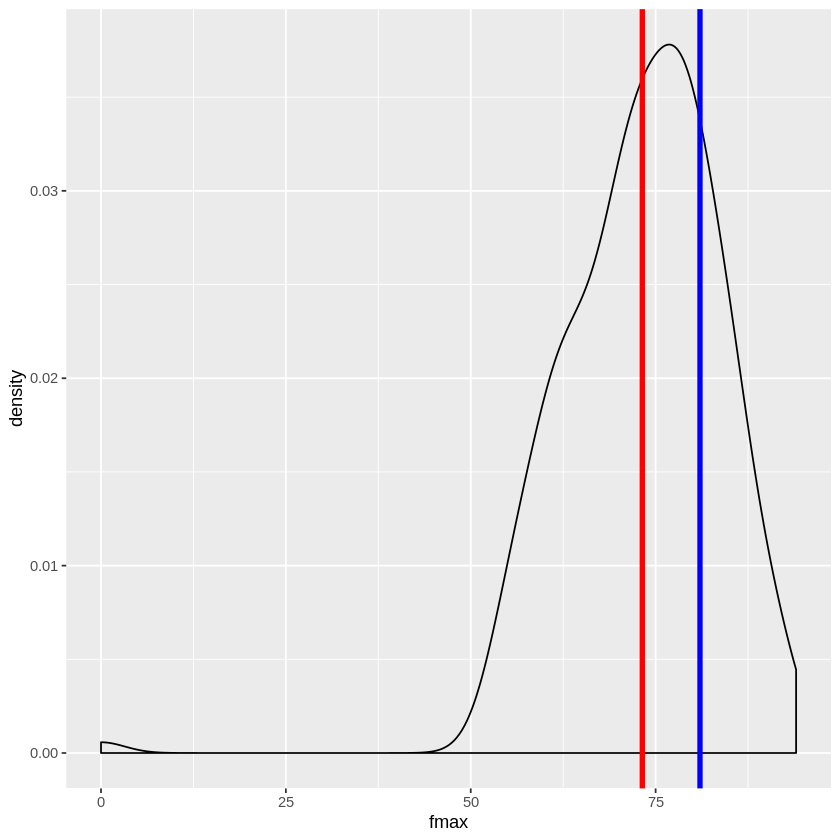

In [42]:
#now to look at the hottest days 
ggplot(data=weather_df, aes(x=fmax,)) + geom_density() +
geom_vline(xintercept = 73.2, size=1.5, color='red') +
geom_vline(xintercept = 81, size=1.5, color='blue')
#mean is a little low at 73.2, maybe look at the upper 75% of high temps

In [41]:
quantile(weather_df$fmax) 
#this shows the max temp was 94 degrees and the top 75% is 81 degrees
#this seems pretty low but I will still look at the top temps

0%  25%  50%  75% 100% 
   0   67   74   81   94

In [46]:
high_temps <- weather_df %>%
filter(fmax >= 81)
nrow(high_temps)
#55 days have a temp greater than or equal to 81 degrees 
#this is the top 25% of the weather data

[1] 55

In [45]:
high_temps

X,date,station,wdf2,wdf5,wsf2,wsf5,wt01,wt02,wt03,wt08,fmax,fmin,course_location,wind_mph,wind_rating,prcp_mm,prcp_rating,year
<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<int>,<dbl>,<int>,<int>
2,04-12-2014,GHCND:USW00013837,200,180,54,76,0,0,0,0,84,57,"Augusta National Golf Club - Augusta, GA",4,2,0.0,0,2014
3,04-13-2014,GHCND:USW00013837,130,130,67,81,0,0,0,0,82,58,"Augusta National Golf Club - Augusta, GA",8,3,0.0,0,2014
12,04-09-2015,GHCND:USW00013837,200,190,72,98,0,0,0,0,90,68,"Augusta National Golf Club - Augusta, GA",8,3,0.0,0,2015
13,04-10-2015,GHCND:USW00013837,210,210,72,103,0,0,1,0,85,67,"Augusta National Golf Club - Augusta, GA",8,3,0.0,0,2015
14,04-11-2015,GHCND:USW00013837,360,250,45,67,1,0,0,0,83,68,"Augusta National Golf Club - Augusta, GA",5,2,0.5,1,2015
16,04-15-2015,GHCND:USW00093831,100,100,103,139,0,0,0,0,87,62,"Harbour Town Golf Links - Hilton Head Island, SC",6,2,36.6,3,2015
21,05-07-2015,GHCND:USW00053860,360,20,89,121,1,0,0,0,86,62,"TPC Sawgrass - Ponte Vedra Beach, FL",10,3,2.0,1,2015
22,05-08-2015,GHCND:USW00053860,320,320,72,89,0,0,0,0,86,66,"TPC Sawgrass - Ponte Vedra Beach, FL",7,3,0.0,0,2015
23,05-09-2015,GHCND:USW00053860,90,90,58,67,1,0,0,0,86,65,"TPC Sawgrass - Ponte Vedra Beach, FL",4,2,0.0,0,2015


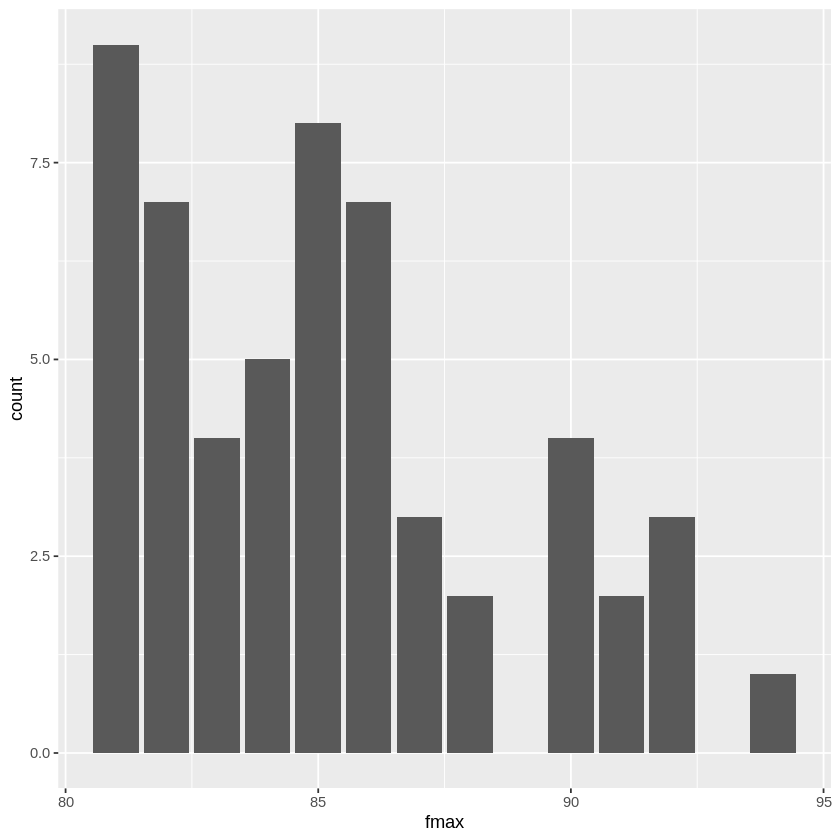

In [49]:
ggplot(data=high_temps, aes(x=fmax)) + geom_bar()
#there is a gap between 88 and 90 degrees 
#lets pull the data from the weather >= 90

In [50]:
highest_temps <- high_temps %>%
filter(fmax >= 90)
nrow(highest_temps)
#these are the 10 hottest days

[1] 10

In [51]:
highest_temps
#the highest temps are in florida and hilton head
#one day in augusta 2015, maybe look into this one
#hilton head 2020 had high temp and heavy rain

X,date,station,wdf2,wdf5,wsf2,wsf5,wt01,wt02,wt03,wt08,fmax,fmin,course_location,wind_mph,wind_rating,prcp_mm,prcp_rating,year
<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<int>,<dbl>,<int>,<int>
12,04-09-2015,GHCND:USW00013837,200,190,72,98,0,0,0,0,90,68,"Augusta National Golf Club - Augusta, GA",8,3,0.0,0,2015
24,05-10-2015,GHCND:USW00053860,150,160,72,89,1,0,0,0,90,65,"TPC Sawgrass - Ponte Vedra Beach, FL",6,2,0.0,0,2015
46,05-13-2016,GHCND:USW00053860,330,320,116,143,0,0,1,0,91,67,"TPC Sawgrass - Ponte Vedra Beach, FL",6,2,8.4,2,2016
47,05-14-2016,GHCND:USW00053860,240,270,81,112,0,0,0,0,90,62,"TPC Sawgrass - Ponte Vedra Beach, FL",7,3,0.0,0,2016
68,05-11-2017,GHCND:USW00053860,230,240,89,121,0,0,0,1,94,68,"TPC Sawgrass - Ponte Vedra Beach, FL",11,3,0.0,0,2017
69,05-12-2017,GHCND:USW00053860,230,220,103,130,0,0,0,1,92,68,"TPC Sawgrass - Ponte Vedra Beach, FL",11,3,0.0,0,2017
91,05-11-2018,GHCND:USW00053860,50,80,72,94,0,0,0,0,92,67,"TPC Sawgrass - Ponte Vedra Beach, FL",7,3,0.0,0,2018
162,06-19-2020,GHCND:USW00093831,300,290,165,192,0,0,0,0,90,68,"Harbour Town Golf Links - Hilton Head Island, SC",4,2,41.4,3,2020
163,06-20-2020,GHCND:USW00093831,190,190,45,67,0,0,0,0,91,67,"Harbour Town Golf Links - Hilton Head Island, SC",4,2,0.0,0,2020


In [ ]:
#highest_temps, rainy days, highest winds have the data worth looking into as outliers
#nothing too out of the ordinary with just weather data, this can be taken to look into the main data
#there are also tournaments played on different dates due to covid, this can be further examined 
#can look into wind direction/fog further if needed

In [ ]:
#longer tournaments for some years than others (scottsdale 2021/2022 are long)
#sawgrass was moved from may to march starting in 2019 could change the tourney
#hilton head had the 2020 tourney moved to june prob due to covid